In [ ]:
##########################################################################################
# Final Project
# This project will be taking the data from climate into below freezing temperatures
# and taking the times where Peyton Manning made completed passes in 
# uncovered arenas and compare it to the passes he makes 
# incomplete in the uncovered areans. This is going to answer the 
# question if Peyton Manning can make complete passes in cold weather.
# Reading in two different data sets. The first data set is 'Peytontemps.csv' which is
# all of the temperatures, dates, and location of the games. In order to solve the
# problem of which arena had a dome closed or open; if it was open I assumed the 
# temperature of 70 degrees (F). The second data set is 'Peytonpassing.csv' which is
# the date of the game, completion percentage and rate percentage.
# 
# By: Heather Bricca
#
# November 28,2018
#
#
# I have not given or received, nor have I tolerated others' use of unauthorized aid.
#
#
##########################################################################################

In [1]:
# Defining the dataset and importing the modules we will need.
import warnings
warnings.filterwarnings('ignore', 'numpy.dtype size changed')

from datetime import datetime
import numpy as np
import pandas as pd

In [2]:
# Importing the data sets here.

pass_percent = pd.read_csv('/home/hbricca/met330/final-project-hbricca/Peytonpassing.csv')
temps = pd.read_csv('/home/hbricca/met330/final-project-hbricca/Peytontemps.csv')

In [17]:
pass_percent.shape

(293, 3)

In [18]:
temps.shape
temps

#temps_values

,Year,Temperatures
0,1998-09-06,70
1,1998-09-13,70
2,1998-09-20,78
3,1998-09-27,70
4,1998-10-04,70
5,1998-10-11,70
6,1998-10-18,61
7,1998-11-01,70
8,1998-11-08,78
9,1998-11-15,70


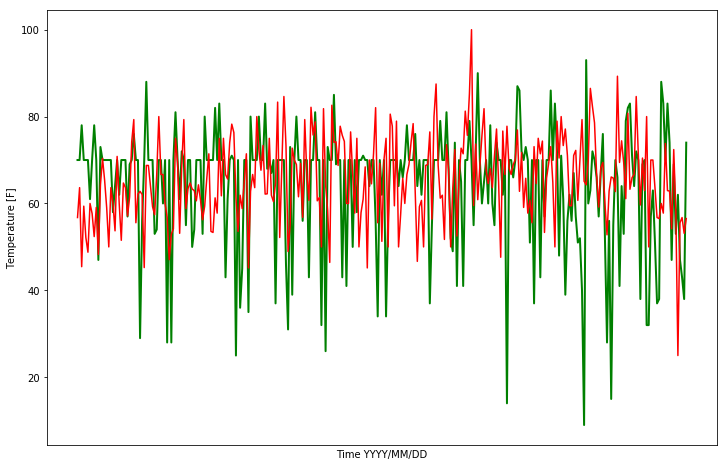

In [7]:
# Plotting the data to see the trend
import matplotlib.pyplot as plt
ipass = pass_percent.iloc[:,1]

# Defining the date and time
date = pass_percent.iloc[:,0]

plt.figure(1, figsize = (12,8))
plt.plot(date, temps_values,linewidth=2, markersize=12, color = 'green')
plt.plot(date, ipass, color = 'red')
plt.xlabel('Time YYYY/MM/DD')
plt.xticks(range(1990, 2016,100))
plt.ylabel('Temperature [F]')
plt.savefig('passingpercentage.png', dpi=150)
plt.show()

In [8]:
ipass.shape


(293,)

In [21]:
# Defining the variables of years
years = temps.Year.values
print(years)
temp = temps.Temperatures.values
print(temp)

['1998-09-06' '1998-09-13' '1998-09-20' '1998-09-27' '1998-10-04'
 '1998-10-11' '1998-10-18' '1998-11-01' '1998-11-08' '1998-11-15'
 '1998-11-22' '1998-11-29' '1998-12-06' '1998-12-13' '1998-12-20'
 '1998-12-27' '1999-09-12' '1999-09-19' '1999-09-26' '1999-10-10'
 '1999-10-17' '1999-10-24' '1999-10-31' '1999-11-07' '1999-11-14'
 '1999-11-21' '1999-11-28' '1999-12-05' '1999-12-12' '1999-12-19'
 '1999-12-26' '2000-01-02' '2000-01-16' '2000-09-03' '2000-09-10'
 '2000-09-25' '2000-10-01' '2000-10-08' '2000-10-15' '2000-10-22'
 '2000-10-29' '2000-11-05' '2000-11-12' '2000-11-19' '2000-11-26'
 '2000-12-03' '2000-12-11' '2000-12-17' '2000-12-24' '2000-12-30'
 '2001-09-09' '2001-09-23' '2001-09-30' '2001-10-14' '2001-10-21'
 '2001-10-25' '2001-11-04' '2001-11-11' '2001-11-18' '2001-11-25'
 '2001-12-02' '2001-12-10' '2001-12-16' '2001-12-23' '2001-12-30'
 '2002-01-06' '2002-09-08' '2002-09-15' '2002-09-22' '2002-10-06'
 '2002-10-13' '2002-10-21' '2002-10-27' '2002-11-03' '2002-11-10'
 '2002-11-

In [29]:
# Now making a definition to determine how many days he played in temperatures that were below 60 degrees
# with 60 degrees being the current benchmark of warmish temperatures in Fahrenheit.

def warm_days(Y, T):
    '''This is the defintion that will determine the number of days that Peyton Manning played
    in temperatures below 60 degrees
    
    where Y is the year,month,day
    and T is the temperatures during corresponding days
    Input:
    temp which is the temperatures from the temps data set
    
    Output:
    days which will be the number of days that were above 60
    and what those temperatures are
    
    if temp >= 60:
        print(temps)
    elif temp < 60:
        temp = false
    '''
    if temp >= 60:
        print(temps)
    elif temp < 60:
        temp = 0
    return warm_days(Y, T)


In [ ]:
# Now making a definition to determine the days in which the temperatures were cold on given dates.
def cold_days(Y,T):
    ''' This is the definition that will determine the days in which the temperature was below
    60 degrees.
    
    where Y is the year,month,day
    and T is the temperature values in Fahrenheit
    
    Input: all temperature values in the array
    Output: only the temperature values that are below 60 degrees
    
    if temp < 60:
        print(temp)

    '''

In [9]:
# Finding the times where he completed passes and the temperatures were warm

temp_warm = 

if ipass.values >60:
    print
    
high_pass_percentages = np.where(ipass > 60)
#high_pass_percentages 

# Now plotting to see if the correlation between warm temperatures and high pass percentages are correlated using
# A scatter plot.
plt.figure(1, figsize = (12,8))
plt.plot(temp_warm, color = 'red' )
plt.plot(high_pass_percentages, color = 'black')
plt.xlabel('Pass Percentages')
plt.ylabel('Temperature [F]')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# Finding the times where he didn't have a high completed pass rate when the temperatures
# when they are 60 degrees and below.

